EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 1: Python (80pts)
## Due 10 October, 2019 at 6:00 PM
### <span style="color: red">YOUR NAME HERE</span>

Copyright &copy; 2019, University of Washington

<hr>

**Instructions**: Use this notebook as a template. <span style="color: red"> Right click the question you want to answer, select the "Insert" dropdown menu, then select "Insert Cell Below" to type your answer below the problem statement. </span> Answer all questions as well formatted Markdown with embedded LaTeX equations, as executable Jupyter cells, or both. Submit your homework solutions as an `.ipynb` file via Canvas.

<span style="background: yellow; padding: 6px; border: 1pt solid black">
Although you may discuss the homework with others, you must turn in your own, original work.
</span>

**Things to remember:**
- Use complete sentences. Equations should appear in text as grammatical elements.
- Comment your code.
- Label your axes. Title your plots. Use legends where appropriate. 
- Before submitting a notebook, choose Kernel -> Restart and Run All to make sure your notebook runs when the cells are evaluated in order. 

Note : Late homework will be accepted up to one week after the due date and will be worth 50% of its full credit score. 

### 0. Warmup (Do not turn in)

- Get Jupyter running on your computer, or learn to use Google Colab's Jupyter environment.
- Make sure you can click through the Lecture 1 notes on Python. Try change some of the cells to see the effects. 
- If you haven't done any Python, follow one of the links in Lecture 1 to a tutorial and work through it.
- If you haven't done any Numpy or Sympy, read through the linked documentation and tutorials for those too.

In [1]:
import random as rand
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pch
from matplotlib.collections import PolyCollection
from sympy import * 
init_printing(use_latex='mathjax')
%matplotlib inline

### 1. Whitespace (10pts)
Write two short Python fragments that are syntactically correct, have exactly the same non-whitespace characters **in the same order**, do not use random number generators, but produce (e.g. print) different results.

In [33]:
x=1; y=2; z=3

if x == 0:
    y = -2
    z = -3
print(z)
    
if x == 0:
    y = -2
z = -3
print(z)

3
-3


### 2. Complex Numbers (10pts)
Write a function `rand_complex(n)` that returns a list of `n` random complex numbers uniformly distributed in the unit circle (i.e. the magnitudes of the numbers are all between 0 and 1). Give the function a docstring. Demonstrate the function by making a list of 25 complex numbers. 

In [4]:
def rand_complex(n):
    '''Assumes n is an integer and random module is imported.
    Returns a list of n random complex number uniformly distributed in the unit circle.'''
    rand.seed(42) #Set random seed for Reproducibility
    re = [] #initialize variables
    im = []
    iterations = 0
    while len(re) < n and len(im) < n: #Continue looping until there is enough points
        iterations += 1
        a = rand.uniform(-1,1) #generate a uniform random number in [-1,1]
        b = rand.uniform(-1,1)
        if np.sqrt(a**2 + b**2) <= 1.0: #Accept only numbers in and on the unit circle (i.e. magnitude <= one)
            re.append(a)
            im.append(b)
    print('Number of iterations required: ', iterations)
    return [complex(re[i], im[i]) for i in range(n)] #generates a list of complex numbers through type casting

z = rand_complex(25)
z

Number of iterations required:  29


[(0.2788535969157675-0.9499784895546661j),
 (-0.4499413632617615-0.5535785237023545j),
 (0.4729424283280248+0.3533989748458226j),
 (-0.15615636062945915-0.9404055611238593j),
 (-0.5627240503927933+0.010710576206724776j),
 (0.2997688755590464+0.08988296120643335j),
 (-0.5591187559186066+0.17853136775181744j),
 (0.6116385036656158+0.3962787899764537j),
 (-0.31949896696401625-0.6890410003764369j),
 (0.9144261444135624-0.32681090977474647j),
 (0.6949887326949196+0.20745206273378214j),
 (0.6142565465487604+0.45946357338763577j),
 (0.07245618290940148+0.9462315279587412j),
 (-0.24293124558329304+0.104081262546454j),
 (0.6588093285059897+0.2370395047284921j),
 (0.7234138006215545+0.15470429051352408j),
 (0.40914367242984695-0.9083512326886756j),
 (-0.5442034486969063-0.42122407279578566j),
 (-0.840416046152745-0.5344182272779396j),
 (-0.7979971411805418-0.44405279377981577j),
 (0.27136888852880037-0.2703356420598315j),
 (-0.2596380657662347-0.5809859384570246j),
 (-0.4660443559017733+0.873309

In [ ]:
'''
Use Polar Coordinates then convert to an imaginary number. Generate a magnitude [0,1], angle [0,2pi].
'''

The code above uses rejection sampling. To visualize this we could do the following:

In [5]:
def plotter(data, title, xlab, ylab):
    '''
    Assumes data is a list or tuple with two elements: a list of x values and a list of y values,
            title is a string,
            xlab is a string,
            ylab is a string.
    Generates a square scatterplot of the data with labels and a grid.
    '''
    X,Y = data #Assign the real and imaginary parts to variables
    plt.scatter(X,Y, alpha=0.6)
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.gca().set_aspect('equal', adjustable='box') #Sets the plot area as a square so the cirlce isn't distorted
    plt.grid()
    plt.show()

Number of iterations required:  630


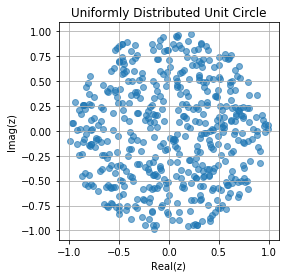

In [6]:
#Generate a list of complex numbers
C = rand_complex(500)

#Split them into their real and imaginary components for plotting
A = [e.real for e in C]
B = [e.imag for e in C]

plotter([A,B], 'Uniformly Distributed Unit Circle', 'Real(z)', 'Imag(z)')

### 3. Hashes (1pt)
Write a function `to_hash(L) `that takes a list of complex numbers `L` and returns an array of hashes of equal length, where each hash is of the form `{ "re": a, "im": b }`. Give the function a docstring and test it by converting a list of 25 numbers generated by your `rand_complex` function. 

In [7]:
def to_hash(L):
    '''Assumes L is a list of complex numbers.
    Returns an array of hashes of equal length, where each hash is of the form { "re": a, "im": b }
    '''
    return np.asarray([{"re": c.real, "im": c.imag} for c in L]) #Dictionary comprehension 

to_hash(z)

array([{'re': 0.2788535969157675, 'im': -0.9499784895546661},
       {'re': -0.4499413632617615, 'im': -0.5535785237023545},
       {'re': 0.4729424283280248, 'im': 0.3533989748458226},
       {'re': -0.15615636062945915, 'im': -0.9404055611238593},
       {'re': -0.5627240503927933, 'im': 0.010710576206724776},
       {'re': 0.2997688755590464, 'im': 0.08988296120643335},
       {'re': -0.5591187559186066, 'im': 0.17853136775181744},
       {'re': 0.6116385036656158, 'im': 0.3962787899764537},
       {'re': -0.31949896696401625, 'im': -0.6890410003764369},
       {'re': 0.9144261444135624, 'im': -0.32681090977474647},
       {'re': 0.6949887326949196, 'im': 0.20745206273378214},
       {'re': 0.6142565465487604, 'im': 0.45946357338763577},
       {'re': 0.07245618290940148, 'im': 0.9462315279587412},
       {'re': -0.24293124558329304, 'im': 0.104081262546454},
       {'re': 0.6588093285059897, 'im': 0.2370395047284921},
       {'re': 0.7234138006215545, 'im': 0.15470429051352408},
  

### 4. Matrices (1pt)

Write a function `upper_traingular(n)` that returns an $n \times n$ numpy matrix with zeros on the lower diagonal, and ones on the diagonal and upper diagonal. For example, `upper_triangular(3)` would return

```python
array([[1, 1, 1],
       [0, 1, 1],
       [0, 0, 1]])
```

In [8]:
def upper_triangular(n):
    '''
    Assumes n > 1 is an integer.
    Returns an n×n numpy matrix with zeros on the lower diagonal, and ones on the diagonal and upper diagonal.
    '''
    uptri = np.eye(n) #Initialize identity matrix
    for i in range(1,n): #Loop through the remaining off diagonals
        uptri += np.diag(np.ones(n-i), k=i) #Add an off diagonal identity matrix to current matrix
    return uptri
                        
upper_triangular(5)

array([[1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1.]])

### 5. Numpy (2pts)

Write a function `convolve(M,K)` that takes an $n \times m$ matrix $M$ and a $3 \times 3$ matrix $K$ (called the kernel) and returns their convolution as in the following diagram:

<img src="http://machinelearninguru.com/_images/topics/computer_vision/basics/convolution/5.JPG" width=500>

Do not use any predefined convolution functions from numpy or scipy. Write your own. If the matrix $M$ is too small, your function should return a exception.

The matrix returned will have two fewer rows and two fewer columns than $M$. Test your function by making a $100 \times 100$ matrix of zeros and ones that as an image look like the letter X and convolve it with the kernel

$$
K = \frac{1}{16} \begin{pmatrix}
1 & 2 & 1 \\
2 & 4 & 2 \\
1 & 2 & 1
\end{pmatrix}
$$

Use `imshow` to display both images using subplots. 

In [9]:
def convolve(K,M):
    '''Assumes n×m matrix M and a 3×3 matrix K (called the kernel) 
    Returns their convolution. If the matrix M is too small, your function should return an exception.
    '''
    nrows, ncols = np.shape(M) #returns this tuple: (number of rows, number of cols)
    if nrows < 3 or ncols < 3:
        raise ValueError('Matrix M is too small. It must be at least 3x3.')
    convolved = np.zeros((nrows-2, ncols-2)) #The matrix returned will have two fewer rows and two fewer columns than M
    for i in range(nrows-2): #Offset is kernel size - 1
        for j in range(ncols-2): 
            block = np.multiply(K, M[i:i+3, j:j+3]) #Haadamard (elementwise) multiplication of 3x3 K and a 3x3 block of M
            convolved[i][j] = sum(sum(block)) #Sums the elements in each row into 1x3 array of row sums; then sums all row sums into the scalar value of the convolution
    convolved = np.asarray(convolved) 
    return convolved

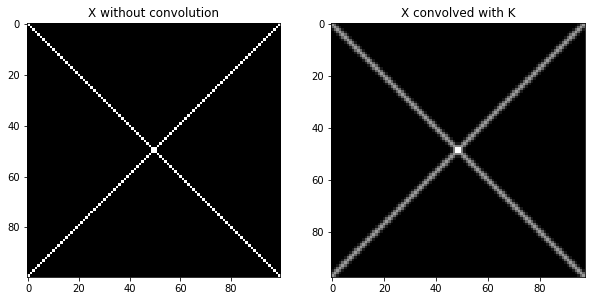

In [10]:
n = 100
I = np.eye(n)
X = I + np.fliplr(I) #Creates an nxn X shape, but there is a 1+1 addition in the center if n is odd
X[np.where(X==2.0)] = 1 #Sets the 1+1 value back to 1, changes nothing if n is even

k = 16*np.asarray([[1, 2, 1],[2, 4, 2],[1, 2, 1]]) #The kernel of interest

data = convolve(k,X) #call our new convolve function

fig,ax = plt.subplots(1, 2, figsize=(10,6))
ax[0].imshow(X, cmap="gray"); ax[0].set_title('X without convolution')
ax[1].imshow(data, cmap="gray"); ax[1].set_title('X convolved with K');

### 6. Visualization (2pts)

Write a function `show_pascal(n)` that returns a plot of Pascal's triangle in the following form. It should work for any number of of rows $n$ and must show the hexagons. Use a keyword argument that defaults to `True` for whether to show the numbers. Make sure the numbers are centered in the hexagons. Details like the bottom row of partial hexagons and the ellipsis are optional. Feel free to use colors and more styling. For example, if you color the hexagons black for even numbers and white for odd numbers, it will look like a Serpinski Gasket! Demonstrate the function with $n=10$ showing the numbers and for $n=50$ without the numbers. 

<img src="https://cdn.mos.cms.futurecdn.net/LH5vimYVrei3iDU2sgDM2G-650-80.jpg" width=250px>

For $n=50$ you may want to not render the edges so that the edges do not take up the whole image.

Note: A previous version of this problem required you to render $n=500$. That will be quite slow to impossible unless you use more advanced methods.

In [11]:
def pascal_hexagons(n):
    '''Assumes n > 0 is an integer indicating the desired number of rows of Pascal's triangle 
    Returns a tuple of the coordinates and the expansion coefficients: (x,y,text)
    '''
    x = []
    y = []
    text = [] #base case
    for i in range(1,n+1): #Number of rows
        block = []
        for j in range(i): #Number of hexagons in row i
            x.append(j-i/2) #Generated x-coordinates
            y.append(-i*np.sqrt(3)/2) #Generate y-coordinates
            if j == 0 or j == i-1: #The edges of Pascal's triangle
                block.append(1)
            elif i > 2: #All other points in row i of Pascal's triangle
                block.append(text[i-2][j] + text[i-2][j-1])                
        text.append(block)
        
        def pascal_elements(L):
            '''Assumes each element of L a the list containing the coefficients of a given row of Pascal's triangle.
            Returns a list with all the coefficients unpacked.
            '''
            elements = []
            for i in L:
                elements += [*i]
            return elements
        
    return (x, y, pascal_elements(text))

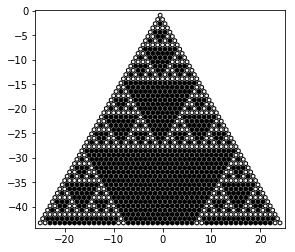

In [31]:
fig,ax=plt.subplots()

def show_pascal(x, y, labels, Serpinski=False):
    '''Assumes coordinates are zipped x,y values like in zip(xs,ys), 
               labels is the horizontally stacked names of each of the hexagons in a row,  
               show_nums is True if you want to see the labels, false otherwise.
       Generates a plot of Pascal's triangle.
    '''
    index = 0
    coordinates = zip(x, y)
    for p in coordinates:
        number = labels[index]
        if Serpinski == False:
            hexa = pch.RegularPolygon(p, 6, radius=np.sqrt(3)/4, orientation=0,facecolor='w',edgecolor='k')
            plt.text(p[0], p[1], number, horizontalalignment="center", verticalalignment="center", family='sans-serif', size=8)
        else:
            Color = 'k' if number%2==0 else 'w'
            hexa = pch.RegularPolygon(p, 6, radius=np.sqrt(3)/4, orientation=0, facecolor=Color, edgecolor='k')              
        ax.add_artist(hexa)            
        index += 1   
    ax.set_xlim(min(x)-1,max(x)+1)
    ax.set_ylim(min(y)-1,max(y)+1)
    ax.set_aspect(1)

pascal_rows = pascal_hexagons(50) #change to 50
xvals, yvals, text = pascal_rows[0], pascal_rows[1], pascal_rows[2]
show_pascal(xvals, yvals, text, Serpinski=True) #change to True to see Serpinski Gasket

In [ ]:
#Add a solution that uses collections


### 7. Symbolic Manipulation (1pt)

Use sympy to specify and solve the following equations for $x$.

- $x^2 + 2x - 1 = 0$ 
- $a x^2 + bx + c = 0$

Also, evaluate the following integrals using sympy

- $\int x^2 dx$
- $\int x e^{6x} dx$
- $\int (3t+5)\cos(\frac{t}{4}) dt$

In [14]:
x, t, a, b, c = symbols("x t a b c") #define the symbols of interest
expr = x**2 + 2*x - 1
expr2 = a*x**2 + b*x +c
solve(expr,x), solve(expr2,x)

⎛                    ⎡        _____________   ⎛       _____________⎞ ⎤⎞
⎜                    ⎢       ╱           2    ⎜      ╱           2 ⎟ ⎥⎟
⎜                    ⎢-b + ╲╱  -4⋅a⋅c + b    -⎝b + ╲╱  -4⋅a⋅c + b  ⎠ ⎥⎟
⎜[-1 + √2, -√2 - 1], ⎢─────────────────────, ────────────────────────⎥⎟
⎝                    ⎣         2⋅a                     2⋅a           ⎦⎠

In [15]:
expr3 = x**2
expr4 = x*exp(6*x)
expr5 = (3*t+5)*cos(t/4)
integrate(expr3,x), integrate(expr4,x), integrate(expr5,t)

⎛ 3             6⋅x                                     ⎞
⎜x   (6⋅x - 1)⋅ℯ             ⎛t⎞         ⎛t⎞         ⎛t⎞⎟
⎜──, ──────────────, 12⋅t⋅sin⎜─⎟ + 20⋅sin⎜─⎟ + 48⋅cos⎜─⎟⎟
⎝3         36                ⎝4⎠         ⎝4⎠         ⎝4⎠⎠

### 8. Typesetting (1.5pts)

Use LaTeX to typeset the following equations.

<img src="https://www.sciencealert.com/images/Equations_web.jpg">

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/dd4df8b838eb08d67530dce5a512756666204499">

$a^2 + b^2 = c^2$

$\log xy = \log x + \log y$

$\frac{df}{dt} = \lim \limits_{h \rightarrow 0} \frac{f(t+h) - f(t)}{h}$

$F = G \frac{m_{1}m_{2}}{r^{2}}$

$i^{2} = -1$

$V - E + F = 2$

$\Phi (x) = \frac{1}{\sqrt{2 \pi \rho}}e^{\frac{(x - \mu)^2}{2 \rho^2}}$

$\frac{\partial^2 u}{\partial t^2} = c^2\frac{\partial^2 u}{\partial x^2}$

$f(\omega) = \int_{-\infty}^{\infty}{f(x)e^{-2 \pi i x \omega} dx}$

$\rho (\frac{\partial \boldsymbol{v}}{\partial t} + \boldsymbol{v} \cdot \nabla \boldsymbol{v}) = - \nabla p + \nabla \cdot \boldsymbol{T} + \boldsymbol{f}$

$\begin{matrix}
     \nabla \cdot \boldsymbol{E} = 0 & \nabla \cdot \boldsymbol{E} = 0 \\
    \nabla \times \boldsymbol{E} = -\frac{1}{c} \frac{\partial \boldsymbol{H}}{\partial t} & \nabla \times \boldsymbol{E} = \frac{1}{c} \frac{\partial E}{\partial t}
\end{matrix}$

$dS \geq 0$

$E = mc^2$

$i\hbar \frac{\partial}{\partial t}\Psi = H \Psi$

$H = - \sum{p(x)\log p(x)}$

$x_{t+1} = k x_t (1 - x_t) $

$\frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} + rS\frac{\partial V}{\partial S} + \frac{\partial V}{\partial t} -rV = 0$

$\begin{equation}
    \begin{bmatrix}
        \lambda_1 & 1 & 0 & 0 & 0 \\
        0 & \lambda_1 & 1 & 0 & 0 \\
        0 & 0 & \lambda_1 & 0 & 0 \\
        0 & 0 & 0 & \lambda_2 & 1 \\
        0 & 0 & 0 & 0 & \lambda_2
    \end{bmatrix}^n
    =
    \begin{bmatrix}
        \lambda_1^n & \binom{n}{1}\lambda_2^{n-1} & \binom{n}{2}\lambda_2^{n-2} & 0 & 0 \\
        0 & \lambda_1^n & \binom{n}{1}\lambda_2^{n-1} & 0 & 0 \\
        0 & 0 & \lambda_1^n & 0 & 0 \\
        0 & 0 & 0 & \lambda_2^n & \binom{n}{1}\lambda_2^{n-1} \\
        0 & 0 & 0 & 0 & \lambda_2^n
    \end{bmatrix}
\end{equation}$